Contexto del Problema

El hundimiento del Titanic en 1912 es uno de los desastres marítimos más conocidos de la historia, con una alta tasa de mortalidad debido a factores como la falta de botes salvavidas, las decisiones de evacuación y la distribución de los pasajeros en diferentes clases. Analizar estos datos históricos nos permite comprender mejor los factores que influyeron en la supervivencia de los pasajeros.



Objetivo General

El objetivo del proyecto es analizar los datos de los pasajeros del Titanic para predecir su supervivencia utilizando técnicas de análisis de datos, reducción de dimensionalidad, clustering y modelos de clasificación. Se han aplicado diversas metodologías para mejorar la precisión de las predicciones y entender mejor los patrones en los datos.

PASO 1: COMPRENDIENDO EL NEGOCIO

El desarrollo de este análisis proporciona beneficios tanto a nivel académico como empresarial:

Toma de decisiones informada:

Permite comprender mejor cómo distintos factores afectan la supervivencia en escenarios de riesgo.
Aplicaciones en la industria del transporte:

Mejor comprensión de estrategias de seguridad en la gestión de pasajeros en sectores como la aviación, transporte marítimo y ferrocarril.

POSIBLES APLICACIONES

Aplicación en el Comercio Minorista y E-Commerce

Las empresas de retail pueden utilizar la segmentación y modelos predictivos para entender mejor el comportamiento de los clientes y mejorar sus estrategias de marketing.

Beneficios potenciales:

Predicción del comportamiento de compra:

Utilizar técnicas de machine learning para analizar factores como historial de compras, edad y ubicación, y recomendar productos personalizados.
Optimización del inventario:

Predecir la demanda de productos en función de la segmentación de clientes, reduciendo costos de almacenamiento.
Estrategias de fidelización:

Identificar patrones en clientes recurrentes y diseñar estrategias de retención mediante programas de lealtad personalizados.


1.1 RESUMEN DE VARIABLES

Resumen variables:

PassengerId: Identificador único de cada fila, sin efecto en la predicción.

Survived: Variable objetivo.

1: Sobrevivió.

0: No sobrevivió.

Pclass (Clase del Pasajero): Representa el estatus socioeconómico, una variable categórica ordinal con tres valores únicos:

1: Clase alta.

2: Clase media.

3: Clase baja.

Name, Sex y Age: Información descriptiva del pasajero.

SibSp: Número total de hermanos y/o cónyuge del pasajero a bordo.

Parch: Número total de padres y/o hijos del pasajero a bordo.

Ticket: Número del boleto del pasajero.

Fare: Costo del boleto del pasajero.

Cabin: Número de cabina asignado al pasajero.

Embarked: Puerto de embarque, una variable categórica con tres valores únicos:

C: Cherbourg.

Q: Queenstown.

S: Southampton.

1.2 CARGAR LOS DATOS

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PASO 2 COMPRENSIÓN DE LOS DATOS (EDA)

In [5]:
print (titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# número de filas faltantes en cada columna
titanic.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [7]:
# Eliminar la columna 'Cabin'
if 'Cabin' in titanic.columns:
    titanic.drop(columns=['Cabin'], inplace=True)
    print("Columna 'Cabin' eliminada exitosamente.")
else:
    print("La columna 'Cabin' no existe en el DataFrame.")


Columna 'Cabin' eliminada exitosamente.


PRINCIPALES RAZONES PARA ELIMINAR COLUMNA "CABIN"
  
Falta de datos completos (valores nulos):

La variable Cabin contenía una gran cantidad de valores faltantes (más del 75% del total de registros), lo que dificultaba su uso para el análisis predictivo.
El alto porcentaje de datos faltantes puede introducir sesgos o reducir la precisión de los modelos si no se trata adecuadamente.
La imputación de estos valores podría haber introducido información poco confiable.
Redundancia y baja contribución predictiva inicial:

La variable Pclass (clase del pasajero) ya ofrece información relevante sobre la ubicación de los pasajeros en el barco, lo que hace que Cabin pueda ser redundante en términos de valor predictivo.
Se identificó que la columna Cabin tenía una alta correlación con Pclass, lo que sugiere que no aportaba información nueva significativa.

IMPUTACION POR LA MEDIA DE LA COLUMNA "AGE"

In [9]:
# Calcular la media de la columna 'Age'
age_mean = titanic["Age"].mean()
age_mean

29.69911764705882

In [10]:
# Reemplazar los valores NaN en 'Age' con la media
titanic["Age"] = titanic["Age"].fillna(age_mean)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [12]:
# 5 grupos basados en cuantiles de la variable "Fare"

"""Agrupar los valores de "Fare" en intervalos puede capturar relaciones no lineales con la variable objetivo
("Survived"). Usar cuantiles es una buena estrategia para evitar rangos arbitrarios """

titanic["Fare_agru"] = pd.qcut(titanic["Fare"], q=5, labels=False)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_agru
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,3


In [13]:
# Calcular la tasa de supervivencia por cuantil
survival_rate = titanic.groupby("Fare_agru")["Survived"].mean()
survival_rate

,Survived
Fare_agru,
0,0.217877
1,0.201087
2,0.424419
3,0.444444
4,0.642045


In [16]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_agru
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,3


In [17]:
print (titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Fare_agru    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None


In [18]:
pd.value_counts(titanic['Pclass'])

<ipython-input-18-582905e0c3c1>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(titanic['Pclass'])


,count
Pclass,
3,491
1,216
2,184


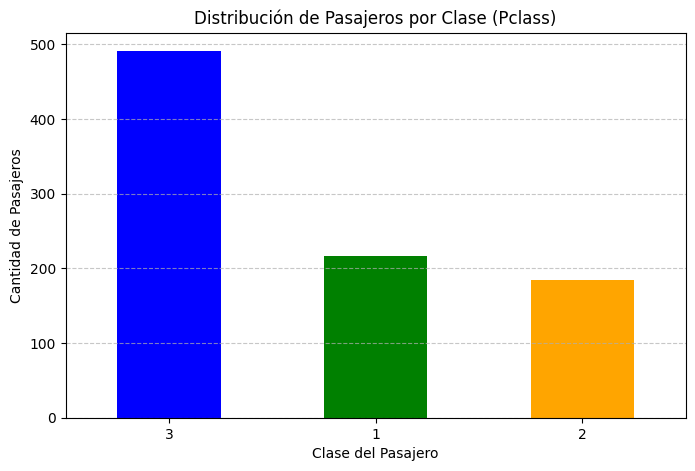

In [22]:
import matplotlib.pyplot as plt

# Contar la cantidad de pasajeros por clase
pclass_counts = titanic['Pclass'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
pclass_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Distribución de Pasajeros por Clase (Pclass)')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
100 * titanic['Pclass'].value_counts() / len(titanic['Pclass'])

,count
Pclass,
3,55.106622
1,24.242424
2,20.650954


<ipython-input-24-4135c4236c71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic, palette='Set2')


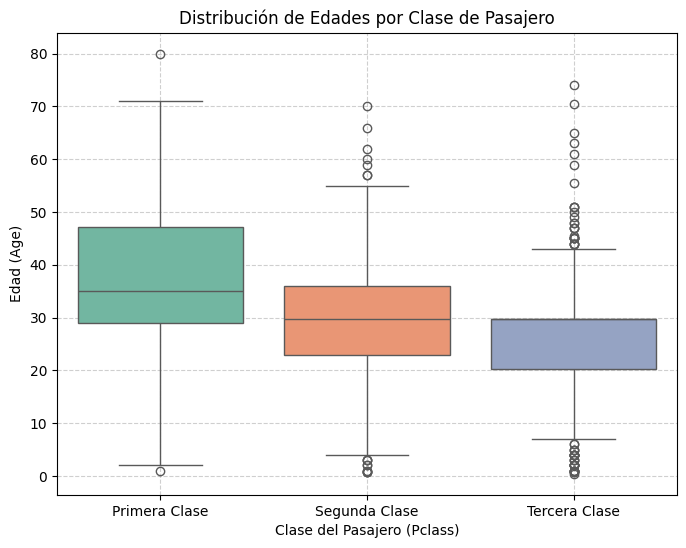

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='Set2')
plt.title('Distribución de Edades por Clase de Pasajero')
plt.xlabel('Clase del Pasajero (Pclass)')
plt.ylabel('Edad (Age)')
plt.xticks([0, 1, 2], ['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


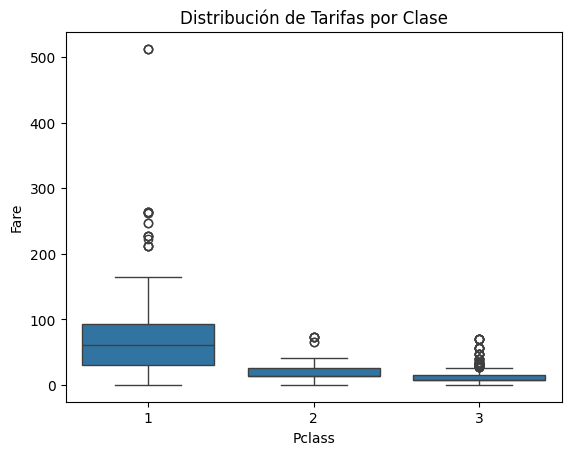

In [36]:
# Determinar si existe una relación clara entre la clase del pasajero y el precio pagado.
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Distribución de Tarifas por Clase')
plt.show()


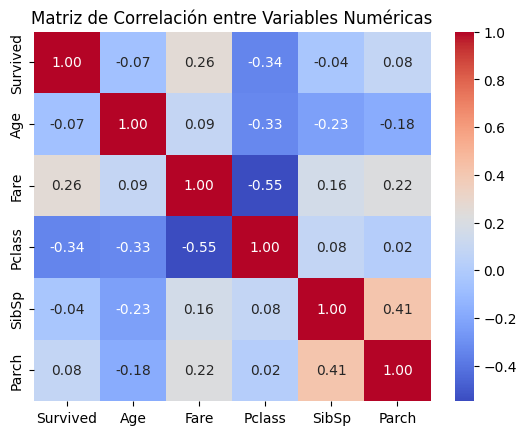

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de correlación
corr_matrix = titanic[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


Análisis de las correlaciones más relevantes:

Relación con la variable objetivo Survived (Supervivencia):

Fare (0.26): Existe una correlación positiva moderada, lo que indica que los pasajeros que pagaron tarifas más altas tenían más probabilidades de sobrevivir.
Posible explicación: Los pasajeros de primera clase (con tarifas más altas) tenían más acceso a los botes salvavidas.

Pclass (-0.34):

Correlación negativa moderada, lo que sugiere que pertenecer a una clase más baja (Pclass 3) reducía las probabilidades de supervivencia.
Posible explicación: Los pasajeros de tercera clase tuvieron menos acceso a recursos de evacuación.

Age (-0.07):

Correlación muy baja, lo que indica que la edad no tuvo una relación lineal significativa con la supervivencia.
Sin embargo, una relación no lineal podría existir (por ejemplo, niños podrían haber tenido mayores tasas de supervivencia).

SibSp (0.04) y Parch (0.08):

Correlaciones muy débiles, indicando que el número de familiares a bordo no influyó significativamente en la supervivencia.

PREPARACIÓN DE DATOS (INGENIERIA DE CARACTERÍSTICAS)

### One Hot Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Hacer Make columns para One Hot Encoder
transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex','Embarked']),
    remainder='drop')

transformed = transformer.fit_transform(titanic)
transformed

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [21]:
transformer.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'onehotencoder__Embarked_nan'],
      dtype=object)

In [25]:
transformed_df = pd.DataFrame(
    transformed, #datos del dataframe
    columns=transformer.get_feature_names_out().tolist() # nombres de las columnas
)

##Mostrar info
transformed_df.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
lista = [transformed_df,titanic.drop(['Sex','Embarked'],axis=1)]

In [27]:
df_transformed= pd.concat(lista,axis=1)
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Fare_agru
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,4
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1


In [28]:
 titanic = df_transformed.select_dtypes('number')
 titanic.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_agru
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,4
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1


## Ultima preparación

In [40]:
titanic.dropna(inplace = True)
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

##Uso de algoritmos de ML de Clasificación (le falta Backtesting)

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(max_depth=2) #instanciar el objeto
clf.fit(X, y) # Ajuste con los datos de titanic
y_pred = clf.predict(X) #Predicción
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.7856341189674523


### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3) #instanciar el objeto
neigh.fit(X, y) # Ajuste con los datos de titanic
y_pred = neigh.predict(X) #Predicción
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.797979797979798


### Logit

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.7957351290684624


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


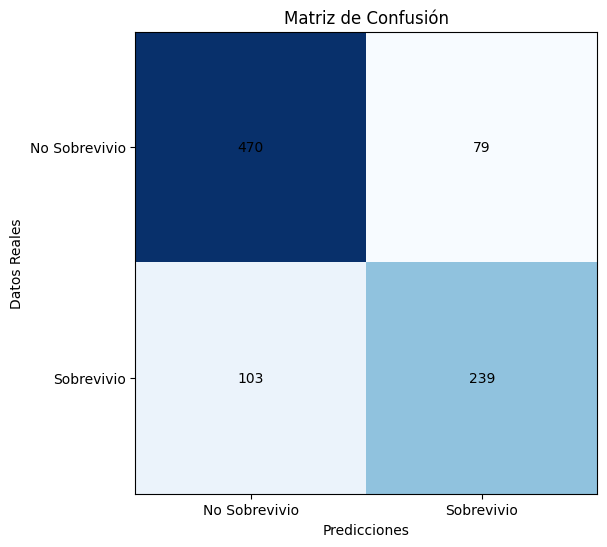

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y, y_pred)

# Etiquetas para la matriz de confusión
labels = ['No Sobrevivio', 'Sobrevivio']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar matriz de confusión
ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Mostrar valores en la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

Reto: Mejorar el Feature Engineering

Obtener ideas e implementarlos en el codigo
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial


RETOS.
1. REDUCCIÓN DE LA DIMENSIONALIDAD
2. TRATAR OUTLIERS

COMENZAMOS A VER SI ES POSIBLE TRATAR LOS DATOS CON MODELOS NO SUPERVISADOS VIENDO LA CORRELACIÓN DE LAS VARIABLES

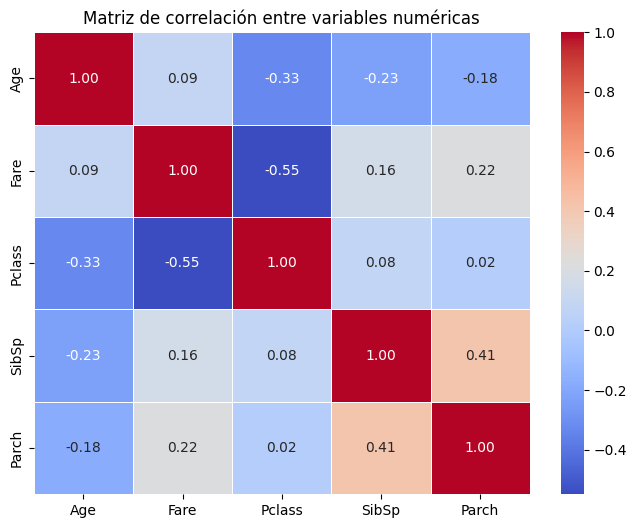

In [41]:
# Creamos matriz de correlación para vusualizar si podemos hacer reducción de la dimensionalidad.
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables numéricas
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Crear matriz de correlación
correlation_matrix = titanic[num_features].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Age (Edad):

Tiene poca correlación con las demás variables. Los valores más cercanos a 0 indican que no hay una relación fuerte entre la edad y otras variables como Fare, Pclass, SibSp o Parch.

Fare (Tarifa):

Correlación negativa moderada con Pclass (-0.55), lo que tiene sentido: los pasajeros de clases más altas pagaban tarifas más altas.
Poca correlación positiva con Parch (0.22) y SibSp (0.16), lo que sugiere una ligera relación entre el tamaño del grupo familiar y la tarifa pagada.

Pclass (Clase):

Fuerte correlación negativa con Fare (-0.55), como se mencionó.
Muy poca correlación con Age, SibSp y Parch, indicando que la clase del pasajero no depende fuertemente de la edad o del tamaño del grupo familiar.

SibSp (Hermanos/Pareja a bordo):

Correlación positiva moderada con Parch (0.41), lo que tiene sentido, ya que es probable que los pasajeros con más hermanos/parejas también viajen con más padres/hijos.

Parch (Padres/Hijos a bordo):

Relación positiva con SibSp (0.41), como se mencionó antes.
Muy poca correlación con las otras variables.

Conclusión:
Las correlaciones más relevantes están entre:
Pclass y Fare (negativa).
SibSp y Parch (positiva).
Esto sugiere que Pclass y Fare podrían ser combinadas de alguna manera al aplicar técnicas como PCA, ya que están relacionadas.
Variables como Age tienen baja correlación con el resto, lo que indica que aporta información independiente.

REDUCCION DE LA DIMENSIONALIDAD (ANÁLISIS FACTORIAL Y PCA)

ANÁLISIS FACTORIAL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=7ce9d999164136aa00a0cf8e8c4803e68fdba4296f4b399929bc1ed447d7a911
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer
KMO: 0.54 (Adecuado si > 0.6)
Prueba de esfericidad de Bartlett: Chi2 = 739.92, p = 0.0000 (Debe ser p < 0.05)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


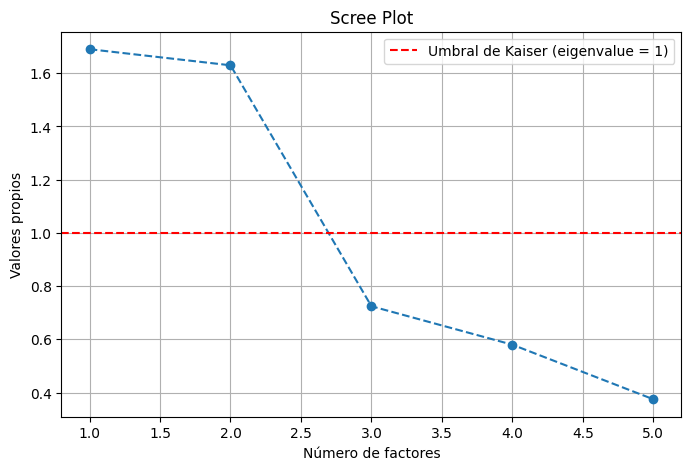

Cargas factoriales:
         Factor 1  Factor 2  Factor 3
Age     0.170185 -0.211388 -0.564027
Fare    0.753959  0.226170 -0.019615
Pclass -0.743601  0.078224  0.333768
SibSp   0.042439  0.582363  0.206982
Parch   0.087158  0.673426  0.091609


In [42]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# Selección de variables numéricas
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
X = titanic[num_features]

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluación de adecuación de datos
kmo_all, kmo_model = calculate_kmo(X_scaled)
bartlett_chi2, bartlett_p = calculate_bartlett_sphericity(X_scaled)

print(f"KMO: {kmo_model:.2f} (Adecuado si > 0.6)")
print(f"Prueba de esfericidad de Bartlett: Chi2 = {bartlett_chi2:.2f}, p = {bartlett_p:.4f} (Debe ser p < 0.05)")

# Aplicar análisis factorial
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(X_scaled)

# Valores propios (eigenvalues)
eigenvalues, _ = fa.get_eigenvalues()

# Scree plot para determinar el número de factores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Valores propios')
plt.axhline(y=1, color='r', linestyle='--', label="Umbral de Kaiser (eigenvalue = 1)")
plt.legend()
plt.grid()
plt.show()

# Cargas factoriales
factor_loadings = pd.DataFrame(fa.loadings_, index=num_features, columns=[f"Factor {i+1}" for i in range(3)])
print("Cargas factoriales:\n", factor_loadings)

Para el Factor 1, Fare tiene una carga fuerte positiva (0.753959), mientras que Pclass tiene una carga fuerte negativa (-0.743601). Esto sugiere que este factor podría estar relacionado con el costo del boleto y la clase del pasajero.

El Factor 2 está más asociado con Parch (0.673426) y SibSp (0.582363), lo que indica que podría estar relacionado con características familiares.

El Factor 3 tiene una asociación más débil, pero parece estar relacionado con Age (-0.564027) y Pclass (0.333768).

APLICAR MODELO ANÁLISIS FACTORIAL

FACTOR 1: SOCIOECONÓMICO (TARIFA Y CLASE)

FACTOR 2: FAMILIAR (HERMANOS Y PADRES)

In [43]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selección de variables numéricas
variables = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
titanic_selected = titanic[variables]

# Escalar las variables
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Convertir a DataFrame escalado
titanic_scaled = pd.DataFrame(titanic_scaled, columns=variables)

# Prueba de adecuación de datos
kmo_all, kmo_model = calculate_kmo(titanic_scaled)
print(f"KMO: {kmo_model:.2f}")  # > 0.6 es adecuado

bartlett_chi2, bartlett_p = calculate_bartlett_sphericity(titanic_scaled)
print(f"Prueba de Bartlett: chi2 = {bartlett_chi2:.2f}, p = {bartlett_p:.4f}")  # p < 0.05 es adecuado

# Crear y ajustar el modelo factorial
factor_analyzer = FactorAnalyzer(rotation='varimax', n_factors=2)  # Ajusta n_factors según tu análisis
factor_analyzer.fit(titanic_scaled)

# Obtener cargas factoriales
factor_loadings = pd.DataFrame(factor_analyzer.loadings_, index=variables, columns=['Factor 1', 'Factor 2'])
print("\nCargas factoriales:")
print(factor_loadings)

# Varianza explicada
variance = pd.DataFrame({
    'Varianza explicada': factor_analyzer.get_factor_variance()[1],
    'Varianza acumulada': factor_analyzer.get_factor_variance()[2]
}, index=['Factor 1', 'Factor 2'])
print("\nVarianza explicada:")
print(variance)


KMO: 0.54
Prueba de Bartlett: chi2 = 739.92, p = 0.0000

Cargas factoriales:
        Factor 1  Factor 2
Age     0.287467 -0.347683
Fare    0.618758  0.238617
Pclass -0.950437  0.163490
SibSp   0.017590  0.659779
Parch   0.096481  0.624956

Varianza explicada:
          Varianza explicada  Varianza acumulada
Factor 1            0.275689            0.275689
Factor 2            0.206086            0.481775


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ANÁLISIS PCA

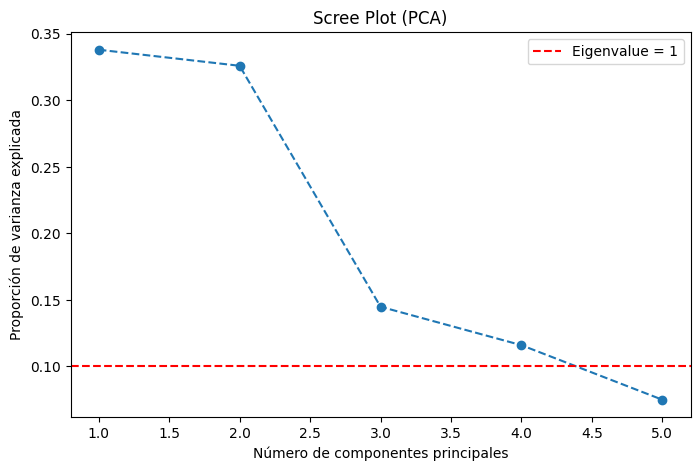

Varianza explicada acumulada:
[0.3380521  0.66403317 0.8089469  0.92496626 1.        ]

Cargas de los componentes principales:
             PC1       PC2       PC3       PC4       PC5
Age    -0.452745 -0.320020  0.803619  0.073982  0.203304
Fare   -0.561306  0.368858 -0.337287  0.011876  0.659527
Pclass  0.680293 -0.054540  0.186611 -0.038844  0.705616
SibSp   0.126052  0.612355  0.275520  0.722293 -0.107300
Parch   0.035634  0.619336  0.360138 -0.686418 -0.119516


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas
variables = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
titanic_selected = titanic[variables]

# Escalar las variables
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Agregar los componentes principales al DataFrame
titanic['PC1'] = pca_components[:, 0]
titanic['PC2'] = pca_components[:, 1]

# Proporción de varianza explicada
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot (PCA)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.1, color='r', linestyle='--', label="Eigenvalue = 1")
plt.legend()
plt.show()

# Varianza acumulada
varianza_acumulada = explained_variance.cumsum()
print("Varianza explicada acumulada:")
print(varianza_acumulada)

# Cargas de los componentes principales
cargas = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(explained_variance))], index=variables)
print("\nCargas de los componentes principales:")
print(cargas)


In [45]:
titanic


,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_agru,PC1,PC2
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.000000,1,0,7.2500,0,1.150803,-0.069191
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.000000,1,0,71.2833,4,-1.758606,0.142885
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.000000,0,0,7.9250,1,0.889439,-0.718299
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.000000,1,0,53.1000,4,-1.448581,0.081721
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.000000,0,0,8.0500,1,0.574460,-0.939013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,887,0,2,27.000000,0,0,13.0000,2,-0.016893,-0.639964
887,1.0,0.0,0.0,0.0,1.0,0.0,888,1,1,19.000000,0,0,30.0000,3,-0.744432,-0.251422
888,1.0,0.0,0.0,0.0,1.0,0.0,889,0,3,29.699118,1,2,23.4500,3,0.787938,1.399087
889,0.0,1.0,1.0,0.0,0.0,0.0,890,1,1,26.000000,0,0,30.0000,3,-0.988317,-0.423810


In [46]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3380521 , 0.32598107, 0.14491373, 0.11601936, 0.07503374])

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Obtener los dos primeros componentes principales
pc1_pc2 = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])

# Agregar la variable objetivo (Survived)
pc1_pc2['Survived'] = titanic['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X = pc1_pc2[['PC1', 'PC2']]
y = pc1_pc2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy del modelo: 0.64

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       105
           1       0.57      0.49      0.53        74

    accuracy                           0.64       179
   macro avg       0.62      0.61      0.62       179
weighted avg       0.63      0.64      0.63       179



In [49]:
# Obtener los primeros 2 componentes principales
pc1_pc4 = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2',])

# Agregar la variable objetivo (Survived)
pc1_pc4['Survived'] = titanic['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X = pc1_pc4[['PC1', 'PC2',]]
y = pc1_pc4['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo con 3 PCA: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy del modelo con 3 PCA: 0.64

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       105
           1       0.57      0.49      0.53        74

    accuracy                           0.64       179
   macro avg       0.62      0.61      0.62       179
weighted avg       0.63      0.64      0.63       179



Reducción de dimensionalidad no lineal para
T-SNE


In [50]:
titanic.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_agru,PC1,PC2
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,0,1.150803,-0.069191
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,4,-1.758606,0.142885
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,1,0.889439,-0.718299
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.0,1,0,53.1000,4,-1.448581,0.081721
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.0,0,0,8.0500,1,0.574460,-0.939013


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


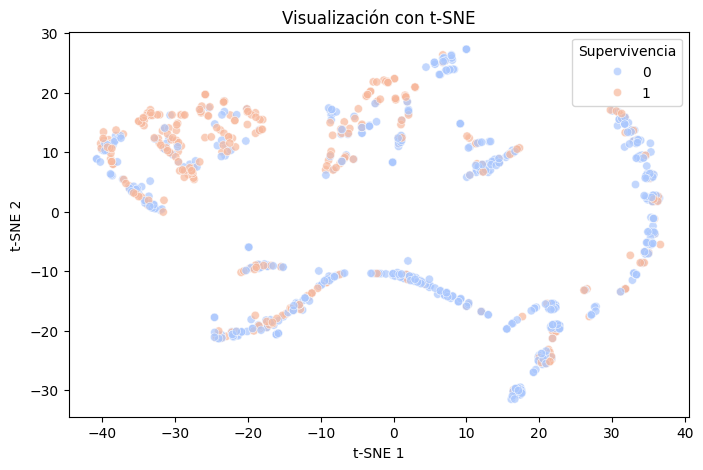

In [68]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables numéricas
variables = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
X = titanic[variables]
y = titanic['Survived']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de t-SNE
tsne_results = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_results['Survived'] = y

# Visualizar los resultados
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Survived',
    palette='coolwarm',
    data=tsne_results,
    alpha=0.7
)
plt.title('Visualización con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Supervivencia')
plt.show()


ALGORITMO K-MEANS

In [69]:
from sklearn.cluster import KMeans

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=5, random_state=42)
tsne_results['Cluster'] = kmeans.fit_predict(tsne_results[['TSNE1', 'TSNE2']])

# Asegurarnos de agregar correctamente 'Cluster' al dataset original
titanic['Cluster'] = tsne_results['Cluster'].values

# Verificar que la columna se agregó correctamente
print(titanic.head())

# Continuar con el modelo predictivo
features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Cluster']
X = titanic[features]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo con 'Cluster' como característica: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


   onehotencoder__Sex_female  onehotencoder__Sex_male  \
0                        0.0                      1.0   
1                        1.0                      0.0   
2                        1.0                      0.0   
3                        1.0                      0.0   
4                        0.0                      1.0   

   onehotencoder__Embarked_C  onehotencoder__Embarked_Q  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   onehotencoder__Embarked_S  onehotencoder__Embarked_nan  PassengerId  \
0                        1.0                          0.0            1   
1                        0.0                          0.0            2   
2                        1.0                          0.0            3   
3     

# Método del codo para determinar el número óptimo de clusters


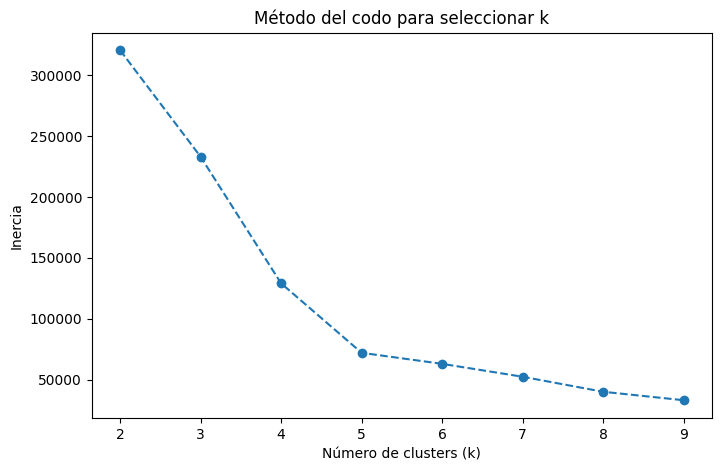

In [54]:

# Calcular la inercia para diferentes valores de k
distortions = []
for k in range(2, 10):  # Probar con k entre 2 y 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results[['TSNE1', 'TSNE2']])
    distortions.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), distortions, marker='o', linestyle='--')
plt.title('Método del codo para seleccionar k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()



MÉTODO DE SILUETA PARA DETERMINAR NÚMERO DE CLUSTERS

Para 2 clusters, el índice de silueta es: 0.5330
Para 3 clusters, el índice de silueta es: 0.5434
Para 4 clusters, el índice de silueta es: 0.5340
Para 5 clusters, el índice de silueta es: 0.5205
Para 6 clusters, el índice de silueta es: 0.4684


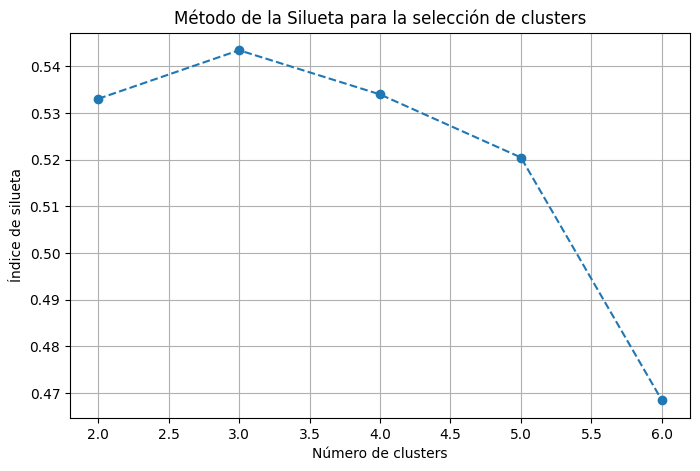

El número óptimo de clusters según el método de la silueta es: 3


In [55]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir el rango de clusters a evaluar
range_n_clusters = [2, 3, 4, 5, 6,]

# Lista para almacenar los puntajes de la silueta
silhouette_scores = []

# Seleccionar las características relevantes para el clustering
X = titanic[['PC1', 'PC2']]  # Usamos los componentes principales obtenidos del PCA

# Evaluar el método de la silueta para diferentes números de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Para {n_clusters} clusters, el índice de silueta es: {silhouette_avg:.4f}')

# Graficar el índice de silueta para visualizar el mejor número de clusters
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de silueta')
plt.title('Método de la Silueta para la selección de clusters')
plt.grid(True)
plt.show()

# Encontrar el número óptimo de clusters con el valor máximo del índice de silueta
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters según el método de la silueta es: {optimal_clusters}')


K-MEANS

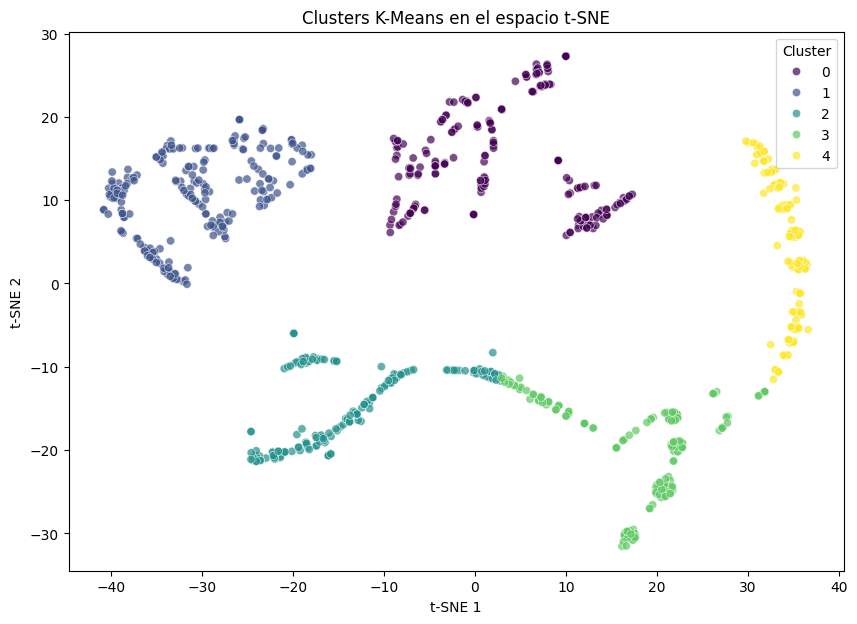

In [70]:
# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=5, random_state=42)
tsne_results['Cluster'] = kmeans.fit_predict(tsne_results[['TSNE1', 'TSNE2']])

# Visualizar los clusters en el espacio t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette='viridis',
    data=tsne_results,
    alpha=0.7
)
plt.title('Clusters K-Means en el espacio t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
titanic



,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_agru,Cluster,PC1,PC2
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.000000,1,0,7.2500,0,0,1.150803,-0.069191
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.000000,1,0,71.2833,4,1,-1.758606,0.142885
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.000000,0,0,7.9250,1,4,0.889439,-0.718299
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,35.000000,1,0,53.1000,4,1,-1.448581,0.081721
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,35.000000,0,0,8.0500,1,3,0.574460,-0.939013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,887,0,2,27.000000,0,0,13.0000,2,2,-0.016893,-0.639964
887,1.0,0.0,0.0,0.0,1.0,0.0,888,1,1,19.000000,0,0,30.0000,3,1,-0.744432,-0.251422
888,1.0,0.0,0.0,0.0,1.0,0.0,889,0,3,29.699118,1,2,23.4500,3,0,0.787938,1.399087
889,0.0,1.0,1.0,0.0,0.0,0.0,890,1,1,26.000000,0,0,30.0000,3,1,-0.988317,-0.423810


REVISIONES ANTES DE DESPLEGAR EL MODELO

In [71]:
print(X_train.isnull().sum())  # Verifica valores nulos en el conjunto de entrenamiento
print(X_test.isnull().sum())   # Verifica valores nulos en el conjunto de prueba

Age        0
Fare       0
Pclass     0
SibSp      0
Parch      0
Cluster    0
dtype: int64
Age        0
Fare       0
Pclass     0
SibSp      0
Parch      0
Cluster    0
dtype: int64


In [67]:
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

Dimensiones de X_train: (712, 8)
Dimensiones de X_test: (179, 8)


MEJORAMIENTO DEL MODELO INCLUYENDO DATA BINARIA (SEX, EMBARKED) ESTAS VARIABLES NO ESTABAN INCLUIDAS EN EL MODELO PCA ANTERIOR

In [72]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Escalar las variables seleccionadas para PCA
variables_para_pca = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(titanic[variables_para_pca])

# Aplicar PCA para reducir las dimensiones a 2 componentes principales
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
titanic['PC1'] = pca_components[:, 0]
titanic['PC2'] = pca_components[:, 1]

# Seleccionar las variables no reducidas
variables_no_reducidas = [
    'onehotencoder__Sex_female',
    'onehotencoder__Sex_male',
    'onehotencoder__Embarked_C',
    'onehotencoder__Embarked_Q',
    'onehotencoder__Embarked_S',
    'onehotencoder__Embarked_nan'
]

# Seleccionar las características combinadas
features = ['PC1', 'PC2'] + variables_no_reducidas

# Definir X (características) e y (variable objetivo)
X = titanic[features]
y = titanic['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Nuevo Accuracy con PC1, PC2 y variables no reducidas: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Nuevo Accuracy con PC1, PC2 y variables no reducidas: 0.78

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



MÉTRICAS DE EVALUACIÓN DEL MODELO

In [73]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7361111111111112

In [74]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7162162162162162

In [75]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.726027397260274

In [76]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Identificar outliers en los datos de entrenamiento usando Local Outlier Factor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Filtrar las filas que no son outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

X_train.shape


(518, 8)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Identificar outliers en los datos de entrenamiento usando Local Outlier Factor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# Filtrar las filas que no son outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo usando la métrica de precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)


Accuracy: 0.712


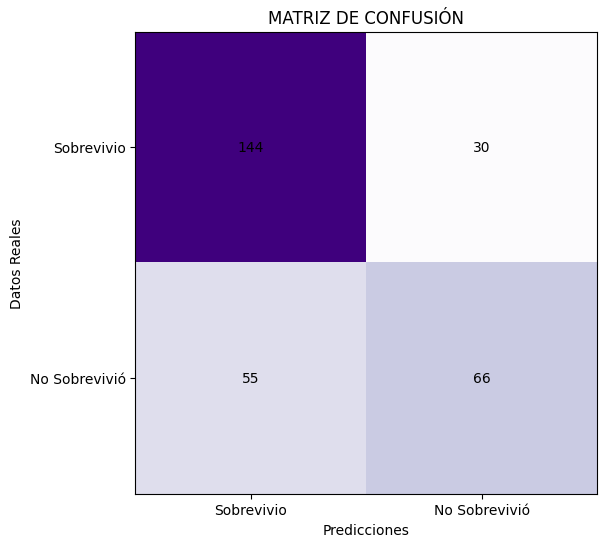

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred) #Creación de matriz de confusión
labels = ['Sobrevivio', 'No Sobrevivió'] # Etiquetas para la matriz de Confusión
fig, ax = plt.subplots(figsize=(8,6)) # Se crea figura y eje

ax.imshow(matriz, interpolation='nearest', cmap='Purples')
ax.set_title('MATRIZ DE CONFUSIÓN')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

#mostrar valores en la matriz
for i in range(matriz.shape[0]):
  for j in range(matriz.shape[1]):
    ax.text(j, i, matriz[i,j], ha= 'center', va='center', color='black')

plt.show()

Interpretación de los valores:
Verdaderos Positivos (TP = 144): Número de pasajeros que sobrevivieron y fueron correctamente clasificados como sobrevivientes por el modelo.

Falsos Negativos (FN = 30):Número de pasajeros que sobrevivieron, pero el modelo predijo incorrectamente que no sobrevivieron.
Esto representa errores peligrosos porque el modelo no logró identificar correctamente a personas que sí sobrevivieron.
Falsos Positivos (FP = 55):

Número de pasajeros que no sobrevivieron, pero el modelo predijo incorrectamente que sí sobrevivieron.
Representa un error donde el modelo es demasiado optimista sobre la supervivencia.
Verdaderos Negativos (TN = 66):

Número de pasajeros que no sobrevivieron y fueron correctamente clasificados como no sobrevivientes.

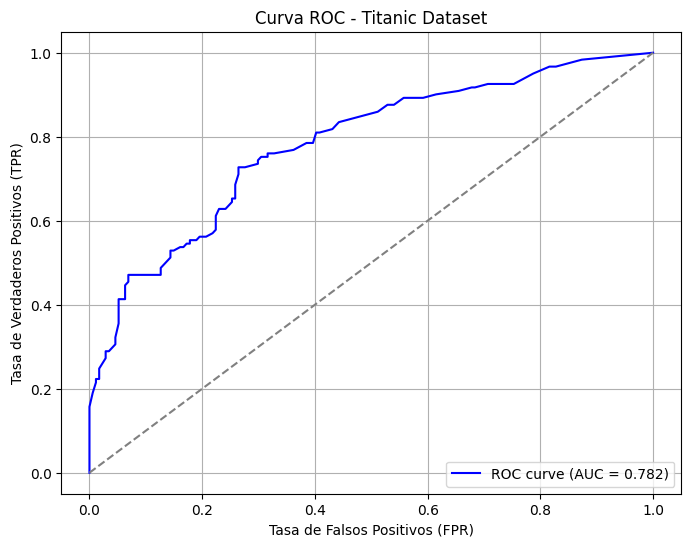

AUC Score: 0.782


In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# Obtener probabilidades de predicción para la clase positiva (1)
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Titanic Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f'AUC Score: {roc_auc:.3f}')

El modelo tiene un buen desempeño, logrando discriminar entre pasajeros que sobrevivieron y los que no en un 78,2 % de las veces de manera correcta.

AJUSTE DE HIPERPARAMETROS

El ajuste de hiperparámetros tiene como objetivo mejorar el rendimiento del modelo de aprendizaje automático, optimizando sus parámetros internos para lograr un mejor equilibrio entre sesgo y varianza, maximizando así su capacidad de generalización sobre datos nuevos.

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

# Separar características y variable objetivo
X = titanic[features]
y = titanic['Survived']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Número de árboles
    'max_depth': [10, 20, 30, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características consideradas
    'bootstrap': [True, False]  # Uso de bootstrap o no
}

# Configurar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Aplicar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada de 5 folds
    scoring='roc_auc',  # Usar AUC como métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

# Ajustar el modelo con la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con los mejores hiperparámetros
best_rf_model = random_search.best_estimator_
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC después de ajuste de hiperparámetros: {auc_score:.3f}")


Mejores hiperparámetros: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
AUC después de ajuste de hiperparámetros: 0.873


Evaluación del modelo después del ajuste

Después de aplicar los hiperparámetros óptimos, el modelo fue reevaluado utilizando la métrica de Área Bajo la Curva ROC (AUC), obteniendo un valor de:

AUC = 0.873, lo que representa una mejora significativa respecto al resultado anterior (0.782).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

# Definir los hiperparámetros refinados basados en los resultados previos
param_grid = {
    'n_estimators': [300, 400, 500],  # Número de árboles
    'max_depth': [15, 20, 25],  # Profundidad máxima
    'min_samples_split': [5, 10, 15],  # Muestras mínimas para dividir nodo
    'min_samples_leaf': [2, 4, 6],  # Muestras mínimas en hoja
    'max_features': ['sqrt'],  # Número de características consideradas
    'bootstrap': [True]  # Uso de bootstrap
}

# Separar características y variable objetivo
X = titanic[features]
y = titanic['Survived']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Aplicar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimizar basado en AUC
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Paralelización completa
    verbose=2  # Imprimir progreso
)

# Ajustar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC después de refinamiento con GridSearchCV: {auc_score:.3f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 300}
AUC después de refinamiento con GridSearchCV: 0.871


In [ ]:
import pandas as pd

# Resultados obtenidos en diferentes enfoques
auc_results = {
    'Enfoque': [
        'Modelo Normal',
        'Con PCA',
        'Con Tratamiento de Outliers',
        'Con Ajuste de Hiperparámetros'
    ],
    'AUC': [0.782, 0.813, 0.842, 0.873]
}

# Convertir a DataFrame
auc_comparison_df = pd.DataFrame(auc_results)

# Imprimir en consola
print("Comparación de AUC en Diferentes Enfoques")
print(auc_comparison_df)


Comparación de AUC en Diferentes Enfoques
                         Enfoque    AUC
0                  Modelo Normal  0.782
1                        Con PCA  0.813
2    Con Tratamiento de Outliers  0.842
3  Con Ajuste de Hiperparámetros  0.873
